# Bank Customer Churn

In [1]:
#importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv("D:/files/Bank_Customer_Churn.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
#checking if there is any NA value
df.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

This data has no NA value.

In the data column customer_id is nominal data which does not give any impact to churn so it should be dropped-

In [6]:
df=df.drop(['customer_id'],axis=1)
df.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
print(list(df))

['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


In [8]:
#data type of variables
df.dtypes

credit_score          int64
country              object
gender               object
age                   int64
tenure                int64
balance             float64
products_number       int64
credit_card           int64
active_member         int64
estimated_salary    float64
churn                 int64
dtype: object

### The overall picture of customer that stayed and those who exited

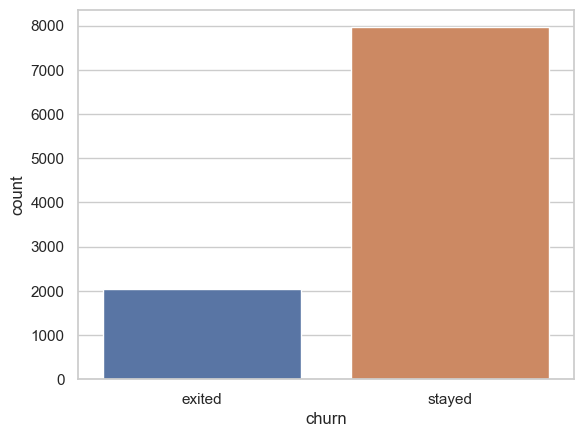

In [9]:
#bar chart
sns.set_theme(style="whitegrid")
sns.countplot(x='churn',data=df.replace({"churn" : {1 : "exited", 0 : "stayed"}}))
plt.show()


In [10]:
#assigning keys for pie chart
size=df['churn'].value_counts()
size
keys=['stayed','exited']

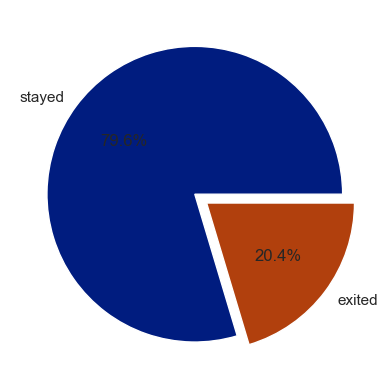

In [11]:
#pie chart
explode=[0,0.1]
palette_color = sns.color_palette('dark')
plt.pie(size, labels=keys, colors=palette_color,explode=explode, autopct='%1.1f%%')
plt.show()

#### Visualizing effects of different variables on staying and exiting

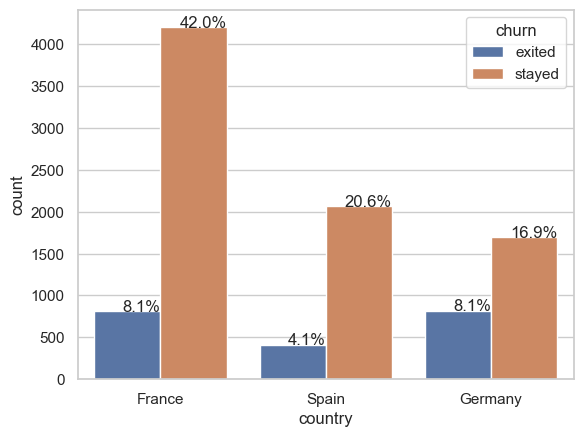

In [12]:
#country wise
s=sns.countplot(x='country',hue='churn',data=df.replace({"churn" : {1 : "exited", 0 : "stayed"}}))
s
total = float(len(df))
for p in s.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    s.annotate(percentage, (x, y),ha="right")

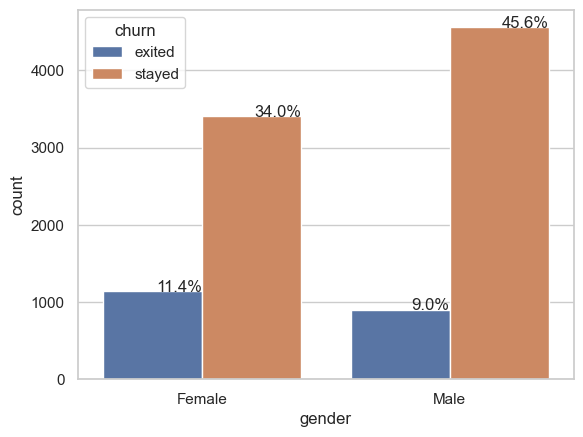

In [13]:
#gender wise
t=sns.countplot(x='gender',hue='churn',data=df.replace({"churn" : {1 : "exited", 0 : "stayed"}}))
t
for p in t.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    t.annotate(percentage, (x, y),ha="right")

### Target variable has binary values here, for modeling and prediction Logistic Regression can be used. 

In [14]:
#In Regression analysis values should be numerical
# labeling nominal data  which is categorical into numeric values
# for gender 1 - female, 0 - male
# for country 0- France, 1- Spain, 2- Germany
df=df.replace({"gender" : {"Female":1,"Male":0 },"country" : {"France":0,"Spain":1,"Germany":2 }})

In [15]:
df.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,1,42,2,0.00,1,1,1,101348.88,1
1,608,1,1,41,1,83807.86,1,0,1,112542.58,0
2,502,0,1,42,8,159660.80,3,1,0,113931.57,1
3,699,0,1,39,1,0.00,2,0,0,93826.63,0
4,850,1,1,43,2,125510.82,1,1,1,79084.10,0
5,645,1,0,44,8,113755.78,2,1,0,149756.71,1
6,822,0,0,50,7,0.00,2,1,1,10062.80,0
7,376,2,1,29,4,115046.74,4,1,0,119346.88,1
8,501,0,0,44,4,142051.07,2,0,1,74940.50,0
9,684,0,0,27,2,134603.88,1,1,1,71725.73,0


In [16]:
#correlation berween variables
cor=df.corr()
cor

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.008267,0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.008267,1.000000,0.016936,0.048092,0.001418,0.348700,-0.006180,0.004036,-0.012692,0.007382,0.153771
gender,0.002857,0.016936,1.000000,0.027544,-0.014733,-0.012087,0.021859,-0.005766,-0.022544,0.008112,0.106512
age,-0.003965,0.048092,0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.001418,-0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.348700,-0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,-0.006180,0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,0.004036,-0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,-0.012692,-0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,0.007382,0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


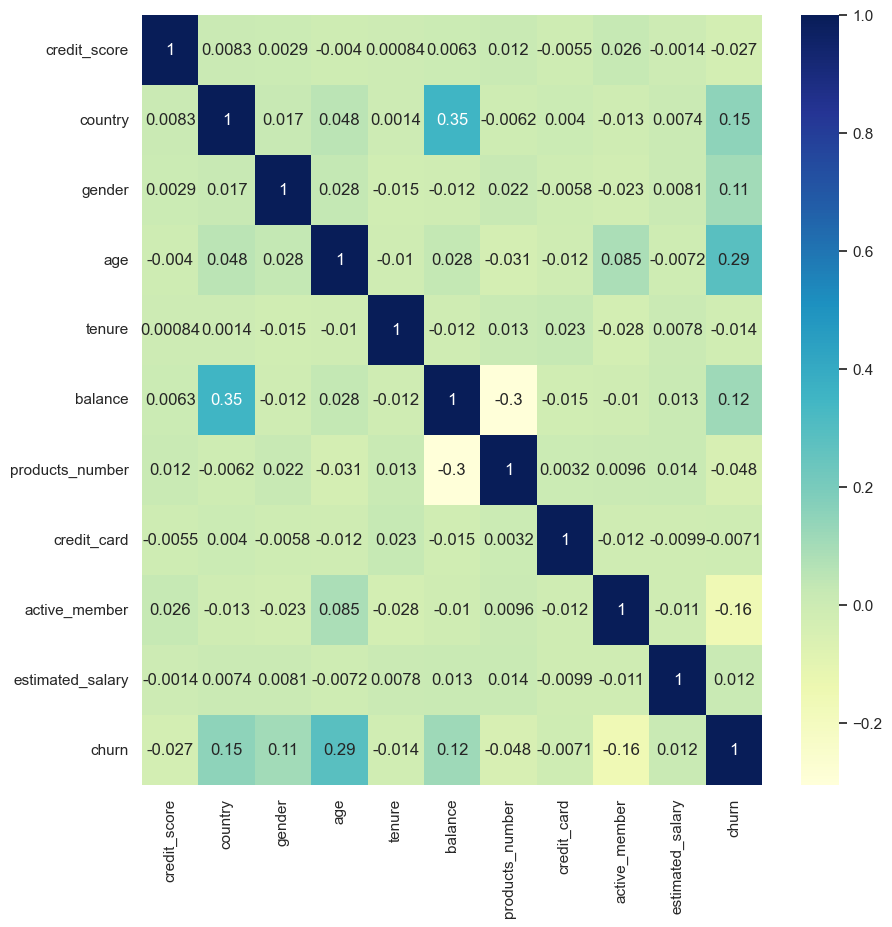

In [17]:
plt.subplots(figsize=(10,10))
sns.heatmap(cor,cmap="YlGnBu",annot=True)
plt.show()

from the above correlation table and heatmap of correlation table can be used to understand the multicollinearity in the data.

In [18]:
#Independet variable dataset
X=df.iloc[:,:10]
X.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,619,0,1,42,2,0.00,1,1,1,101348.88
1,608,1,1,41,1,83807.86,1,0,1,112542.58
2,502,0,1,42,8,159660.80,3,1,0,113931.57
3,699,0,1,39,1,0.00,2,0,0,93826.63
4,850,1,1,43,2,125510.82,1,1,1,79084.10


In [19]:
#splitting data set into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,df.churn,train_size=0.8)

In [20]:
X_train.head()

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
2781,732,2,1,61,9,94867.18,2,1,1,157527.60
5995,622,0,0,59,5,119380.37,1,1,1,60429.43
8825,611,2,1,49,9,115488.52,2,1,1,138656.81
6307,583,2,0,27,4,105907.42,2,1,1,195732.04
880,749,0,1,60,6,0.00,1,1,0,17978.68


In [21]:
y_train.head()

2781    1
5995    0
8825    1
6307    0
880     1
Name: churn, dtype: int64

In [22]:
#logistic regression module
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
#fittig model
model.fit(X_train, y_train)

LogisticRegression()

In [24]:
model.coef_

array([[-5.11041053e-03,  1.68792613e-03,  8.71292172e-04,
         4.58909614e-02, -1.12824985e-03,  3.41675511e-06,
        -2.83344147e-04, -1.96594742e-04, -1.36514240e-03,
        -1.64295075e-06]])

In [25]:
c=model.coef_[0]

In [26]:
#coefficent of the model
coeff = pd.Series(c, index = X.columns)
intercept = model.intercept_
print("Coefficients are :")
print(coeff)
print("\n\n")
print("intercept of the model :")
print(model.intercept_)

Coefficients are :
credit_score       -0.005110
country             0.001688
gender              0.000871
age                 0.045891
tenure             -0.001128
balance             0.000003
products_number    -0.000283
credit_card        -0.000197
active_member      -0.001365
estimated_salary   -0.000002
dtype: float64



intercept of the model :
[-0.00016088]


In [27]:
#predicted target value of test set

with np.printoptions(threshold=np.inf):
    print(model.predict(X_test))

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [28]:
#accuracy of the model
from sklearn.metrics import classification_report

In [29]:
#classification report
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.98      0.88      1601
           1       0.38      0.06      0.11       399

    accuracy                           0.79      2000
   macro avg       0.60      0.52      0.50      2000
weighted avg       0.72      0.79      0.73      2000



precision and recall of being exited from bank ('1') is low that mean we have case of high number of false positives and high number of false negatives for '1'. The accuracy of the model is 79 % which may not be consider as good.  
So Logistic regression model may not be suitable for this data and this specific problem.

### Logistic Regression can also be performed using Statsmodels module, it gives the whole summary of fitted model with relevent statistics.

In [30]:
xy_train=X_train.copy()

In [31]:
xy_train['y']=y_train.copy().tolist()


In [32]:
xy_train.head(10)

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,y
2781,732,2,1,61,9,94867.18,2,1,1,157527.60,1
5995,622,0,0,59,5,119380.37,1,1,1,60429.43,0
8825,611,2,1,49,9,115488.52,2,1,1,138656.81,1
6307,583,2,0,27,4,105907.42,2,1,1,195732.04,0
880,749,0,1,60,6,0.00,1,1,0,17978.68,1
2954,538,0,1,33,5,0.00,2,1,0,126962.41,0
3825,548,1,0,44,8,0.00,1,1,0,16989.77,0
5791,809,2,1,42,6,64497.94,3,0,1,182436.81,1
309,438,2,0,31,8,78398.69,1,1,0,44937.01,0
3690,670,1,0,67,6,158719.57,1,1,1,118607.40,0


In [33]:
import statsmodels.formula.api as smf

In [34]:
xy_train.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'y'],
      dtype='object')

In [35]:
model1 = smf.logit('y~credit_score+country+gender+age+tenure+balance+products_number+credit_card+active_member+estimated_salary',data=xy_train).fit()

Optimization terminated successfully.
         Current function value: 0.428633
         Iterations 6


In [36]:

#view model summary
print(model1.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 8000
Model:                          Logit   Df Residuals:                     7989
Method:                           MLE   Df Model:                           10
Date:                Tue, 24 Jan 2023   Pseudo R-squ.:                  0.1544
Time:                        14:11:13   Log-Likelihood:                -3429.1
converged:                       True   LL-Null:                       -4055.3
Covariance Type:            nonrobust   LLR p-value:                6.642e-263
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -4.0207      0.274    -14.658      0.000      -4.558      -3.483
credit_score        -0.0009      0.000     -2.859      0.004      -0.002      -0.000
country              0.3848 

Intercept and coefficient are not similiar to the result of sklearn but the prediction is much similiar. 

In [37]:
#predicted values of target values for Test data set
yhat = model1.predict(X_test)
prediction = list(map(round, yhat))

In [38]:
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [39]:
#classification report of logistic regression
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1601
           1       0.55      0.20      0.29       399

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



precision,recall and f1-score for '1' is low. Accuracy of the model is 81%

### In classification problem like that 'Decision Tree classifier' method is also used.

In [40]:
#importing decision tree classifier library
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [41]:
cls = tree.DecisionTreeClassifier()

In [42]:
dt_Xtrain=X_train.copy()
dt_Ytrain=y_train.copy()

In [43]:
#fitting model by training dataset
cls=cls.fit(dt_Xtrain, dt_Ytrain)

[Text(0.6444767630879005, 0.9782608695652174, 'X[3] <= 42.5\ngini = 0.326\nsamples = 8000\nvalue = [6362, 1638]'),
 Text(0.46496640306022297, 0.9347826086956522, 'X[6] <= 2.5\ngini = 0.204\nsamples = 5645\nvalue = [4996, 649]'),
 Text(0.3548071779797425, 0.8913043478260869, 'X[6] <= 1.5\ngini = 0.18\nsamples = 5511\nvalue = [4960, 551]'),
 Text(0.24053654502983668, 0.8478260869565217, 'X[3] <= 38.5\ngini = 0.267\nsamples = 2706\nvalue = [2277, 429]'),
 Text(0.14589328478329144, 0.8043478260869565, 'X[1] <= 1.5\ngini = 0.223\nsamples = 2098\nvalue = [1830, 268]'),
 Text(0.09189649418969849, 0.7608695652173914, 'X[5] <= 69498.762\ngini = 0.185\nsamples = 1600\nvalue = [1435, 165]'),
 Text(0.03758636934673367, 0.717391304347826, 'X[3] <= 30.5\ngini = 0.338\nsamples = 386\nvalue = [303, 83]'),
 Text(0.008793969849246231, 0.6739130434782609, 'X[3] <= 18.5\ngini = 0.185\nsamples = 116\nvalue = [104, 12]'),
 Text(0.007788944723618091, 0.6304347826086957, 'gini = 0.0\nsamples = 1\nvalue = [0, 

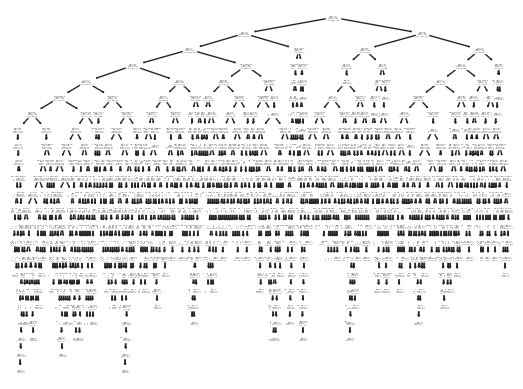

In [44]:
#Decision tree 
tree.plot_tree(cls) #selection of nodes is done using 'Gini Impurity' by default

Decision tree is dense because of too many variables

In [45]:
dtree_pred=cls.predict(X_test)

In [46]:
print(list(map(round, dtree_pred)))

[0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [47]:
#classification report of decison tree 
print(classification_report(y_test,dtree_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86      1601
           1       0.46      0.49      0.47       399

    accuracy                           0.78      2000
   macro avg       0.66      0.67      0.67      2000
weighted avg       0.79      0.78      0.79      2000



The accuracy of the decision tree model is 78% which is almost similiar to logistic regression's .

### Gaussian Naive Baye's classifier is also used 

Gaussian Naive Bayes assumes idependent variable as normally distributed. So standardising independent variables

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
scaler=StandardScaler()

In [50]:
Xstd_train=scaler.fit_transform(X_train.copy()) #standardised training dataset
Xstd_test=scaler.fit_transform(X_test.copy()) #standardised test dataset
Ygb_train=y_train.copy()

In [51]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

In [52]:
nb=nb.fit(Xstd_train,Ygb_train)

In [53]:
nb_predict=nb.predict(Xstd_test)

In [54]:
print(list(map(round, nb_predict)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 

In [55]:
#classification report of Gaussian naive bayes algorithm 
print(classification_report(y_test,nb_predict))

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      1601
           1       0.65      0.27      0.38       399

    accuracy                           0.83      2000
   macro avg       0.75      0.62      0.64      2000
weighted avg       0.80      0.83      0.80      2000



Accuracy of the model based on Gaussian Naive Bayes classification is 83%. It is slightly better than all previously used.

## Random Forest Classification

Random Forest is a concept from ensemble learning where multiple model trained parallel used to get the results with better accuracy. Random Forest is based on Bagging technique, it is also known as Bootstrap aggregating.

In [56]:
# importing random forest classifier library
from sklearn.ensemble import RandomForestClassifier

In [57]:
clf_rfc = RandomForestClassifier(n_estimators = 100) 

In [58]:
rfc_Xtrain=X_train.copy()
rfc_Ytrain=y_train.copy()

In [59]:
#fitting random forest model 
clf_rfc.fit(rfc_Xtrain, rfc_Ytrain)

RandomForestClassifier()

In [60]:
#predicted values
rfc_predict=clf_rfc.predict(X_test)

In [61]:
print(list(map(round, rfc_predict)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [62]:
#classification report
print(classification_report(y_test,rfc_predict))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1601
           1       0.73      0.44      0.55       399

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Model using Random Forest Classification has 86% accuracy here which is also better than the model using Gaussian Naive bayes method.

## XGBoost Classification

XGBoost stands for Extreme Gradient Boosting. It is a concept from ensemble learning. It is based on boosting technique. It uses gradient boosting framework.

In [63]:
#installing xgboost library
import xgboost as xgb

In [64]:
#creating xgboost classifier instance
xgb_classifier = xgb.XGBClassifier()

In [65]:
#training data
xg_Xtrain=X_train.copy()
xg_Ytrain=y_train.copy()

In [66]:
#fitting model
xgb_classifier.fit(xg_Xtrain,xg_Ytrain) #taking values n-estimator, lamda, gamma as default

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [67]:
#predicted values
xg_predict=xgb_classifier.predict(X_test)

In [68]:
print(list(map(round, xg_predict)))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 

In [69]:
#classification report
print(classification_report(y_test,xg_predict))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1601
           1       0.68      0.47      0.56       399

    accuracy                           0.85      2000
   macro avg       0.78      0.71      0.73      2000
weighted avg       0.84      0.85      0.84      2000



After trying these algorithm we get -
   
   
   Algorithm                                              Accuracy
 1. Logistic Regression                                      81%
 2. Decision Tree                                            78%
 3. Gaussian Naive Bayes Classification                      83%
 4. Random Forest Classification                             86%
 5. XGBoost                                                  85%
